# Task 1
A table of some synthetic data is available to you, on the basis of which it is necessary to classify a new object using the k-nearest neighbors method.

Вам доступна таблица некоторых синтетических данных, на основании которых необходимо выполнить классификацию нового объекта, с помощью метода k-ближайших соседей.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import os

def load_data(data_dir, link):
  if not (os.path.exists(data_dir)):
    print('========= Downloading data ... =========')
    os.system('wget ' + link + ' -O ' + data_dir + '.zip')
    os.system('unzip ' + data_dir + '.zip' + ' -d ' + data_dir)
    os.system('rm -rf ' + data_dir + '/__MACOSX')
    os.system('rm ' + data_dir + '.zip')
    print('=========       Success        =========')
  else:
    print('========= Data is already dowloaded =========')

In [ ]:
data_dir1 = '/content/data1'
link1 = 'https://github.com/Mark1708/ml-and-ds-online-course/raw/main/data/knn-and-naive-bayesian-classifier/syntetic_data.csv.zip'
load_data(data_dir1, link1)

========= Downloading data ... =========
=========       Success        =========


In [ ]:
nn = pd.read_csv(data_dir1 + '/syntetic_data.csv', delimiter=',', index_col='id')

In [ ]:
new_object = np.array([74, 92]).reshape(1, 2)
k = 3

In [ ]:
xy = pd.DataFrame(nn.drop(['Class'], axis=1))
Class = pd.DataFrame(nn['Class'])

In [ ]:
# При p=1 это эквивалентно использованию manhattan_distance
md = KNeighborsClassifier(n_neighbors=3, p=1)
md.fit(xy, Class)

# При p=2 это эквивалентно использованию euclidean_distance
ed = KNeighborsClassifier(n_neighbors=3, p=2)
ed.fit(xy, Class)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Enter the distance from the new object with coordinates (74, 92) to the nearest neighbor using the Euclidean metric.

Введите расстояние от нового объекта с координатами (74, 92) до ближайшего соседа, используя евклидову метрику.

In [ ]:
round(ed.kneighbors(new_object)[0][0][0], 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


8.062

Enter the IDs of the three closest points to (74, 92) for the Euclidean metric.

Введите идентификатры трех ближайших точек к (74, 92) для евклидовой метрики.

In [ ]:
[i + 1 for i in ed.kneighbors(new_object)[1][0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[9, 10, 7]

Enter a class for a new object with coordinates (74, 92) at k = 3 and a Euclidean metric.

Введите класс для нового объекта с координатами (74, 92) при k = 3 и евклидовой метрике.

In [ ]:
ed.predict(new_object)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

Enter the distance from the new object with coordinates (74, 92) to the nearest neighbor using the metric of city blocks (Manhattan distance).

Введите расстояние от нового объекта с координатами (74, 92) до ближайшего соседа, используя метрику городских кварталов (Манхеттенское расстояние).

In [ ]:
round(md.kneighbors(new_object)[0][0][0], 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


11.0

Enter the IDs of the three closest points to (74, 92) for the city block metric.

Введите идентификатры трех ближайших точек к (74, 92) для метрики городских кварталов.

In [ ]:
[i + 1 for i in md.kneighbors(new_object)[1][0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[9, 10, 7]

Enter a class for a new object with coordinates (74, 92) at k = 3 and metrics of city blocks.

In [ ]:
md.predict(new_object)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

# Task 2
The table contains data on the classification of emails for "spam"/"not spam" and the total number of words included in these groups:

Таблица содержит данные о классификации писем на «спам»/«не спам» и общее количество слов, входящих в эти группы: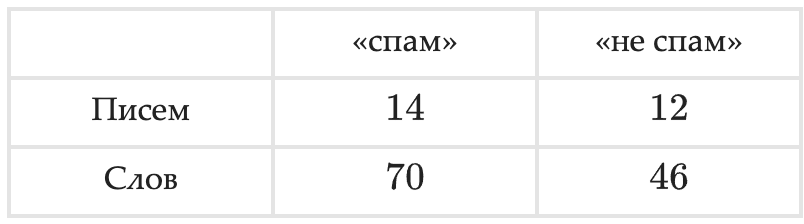

The second table shows data on unique words and the number of their occurrences in these groups:

Во второй таблице представлены данные, по уникальным словам, и числу их вхождений в указанные группы:

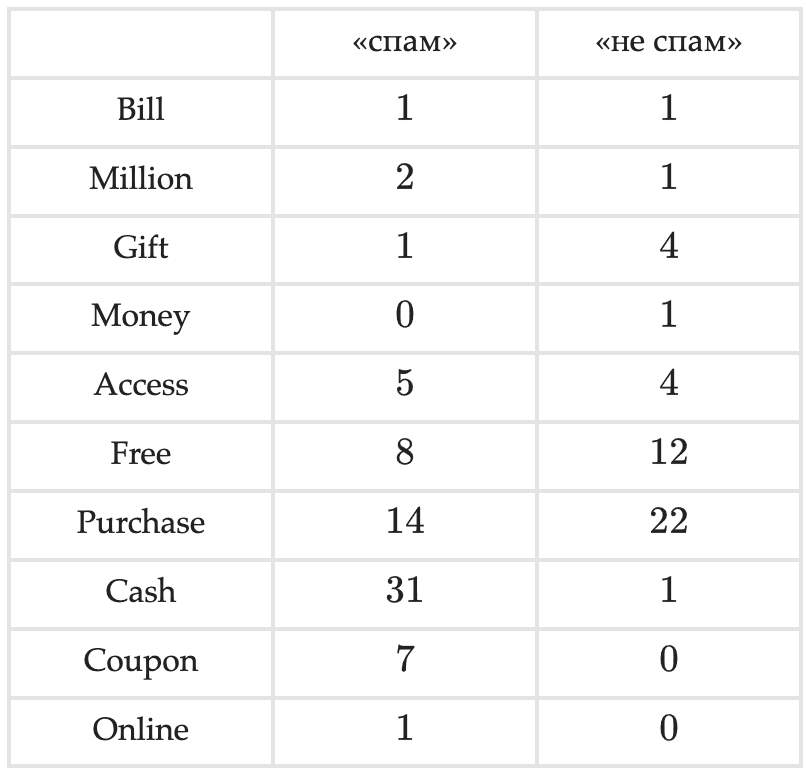

Your task is to build a model of a naive Bayesian classifier and determine the class to which the letter containing the text will be assigned:

Ваша задача построить модель наивного байесовского классификатора и определить класс, к которому будет отнесено письмо, содержащее текст:

## Gift Purchase Offer Access Money Million Investment


In [ ]:
import math

In [ ]:
data_dir2 = '/content/data2'
link2 = 'https://github.com/Mark1708/ml-and-ds-online-course/raw/main/data/knn-and-naive-bayesian-classifier/mail.zip'
load_data(data_dir2, link2)

========= Downloading data ... =========
=========       Success        =========


In [ ]:
classifications = pd.read_csv(data_dir2 + '/mail_classification_data.csv', delimiter=',', index_col='объект')
words = pd.read_csv(data_dir2 + '/mail_word_class_data.csv', delimiter=',', index_col='Слово')
text_arr = 'Gift Purchase Offer Access Money Million Investment'.split(' ')

In [ ]:
words['F_spam'], words['F_not_spam'] = None, None

Determine the probability that the email is spam based on the training data set.

Определите вероятность того, что письмо является спамом, исходя из тренировочного набора данных.

In [ ]:
emails = classifications.loc['Писем'].to_frame().T
round(float(emails['спам'] / (emails['спам'] + emails['не спам'])), 3)

0.538

In [ ]:
def P_x(a, class_name, word, M):
  return math.log(float((a + words[class_name][word]) / (a * M + words[class_name].sum())))

In [ ]:
quantity = len(words.index)
a = 1

for test_word in text_arr:
  if test_word not in words.index:
    words = words.append(pd.Series(data={'спам': 0, 'не спам': 0, 'F_spam': None, 'F_not_spam': None}, name=test_word), ignore_index=False)
  words['F_spam'][test_word] = P_x(a, 'спам', test_word, quantity)
  words['F_not_spam'][test_word] = P_x(a, 'не спам', test_word, quantity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Calculate F("spam"):

Вычислите F(«спам»):

In [ ]:
prob_spam = float(words['F_spam'].sum())
print(prob_spam + math.log(14/26))

-25.001656511565074


Calculate F("not spam"):

Вычислите F(«неспам»):

In [ ]:
prob_not_spam = float(words['F_not_spam'].sum())
print(prob_not_spam  + math.log(12/26))

-21.209987321462286


Calculate the probability P (Class = "spam" | Letter) that the Gift Purchase Offer Access Money Million Investment letter is spam.

Вычислите вероятность P (Класс = «спам» | Письмо), что письмо Gift Purchase Offer Access Money Million Investment является спамом.

In [ ]:
spam_div_all = math.log(classifications['спам']['Писем']/(classifications['не спам']['Писем'] + classifications['спам']['Писем']))
not_spam_div_all = math.log(classifications['не спам']['Писем']/(classifications['не спам']['Писем'] + classifications['спам']['Писем']))
round(1 / (1 + math.exp((prob_not_spam  + not_spam_div_all) - (prob_spam + spam_div_all))), 4)

0.0221